# Visualize

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import numpy as np
import os
from datetime import datetime
from matplotlib import patheffects
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

In [2]:
# Pfad
TEMPLATE_PATH = os.path.abspath(os.path.join(os.getcwd(), "..", "..", "_templates"))

In [3]:
# Daten einlesen
alt_parteien = pd.read_pickle(os.path.join(TEMPLATE_PATH, "große.pickle"))
neue_parteien = pd.read_pickle(os.path.join(TEMPLATE_PATH, "kleine.pickle"))
wahlen_df = pd.read_pickle(os.path.join(TEMPLATE_PATH, "wahlen.pickle"))
alle = pd.read_pickle(os.path.join(TEMPLATE_PATH, "alle_parteien.pickle"))

In [4]:
# Liste der Parteifarben
parteifarben = {'cdu': 'black', 'spd': 'red', 'grüne': 'green','grünen': 'green',
                'fdp': '#DAA520', 'linke': 'purple', 'afd': 'blue'}

## Inspect

In [5]:
alt_parteien.head()

,date,word,count,month,quarter
1,2021-04-01,cdu,43,2021-04,2021Q2
5,2021-04-01,spd,7,2021-04,2021Q2
7,2021-04-02,cdu,71,2021-04,2021Q2
11,2021-04-02,spd,10,2021-04,2021Q2
13,2021-04-03,cdu,47,2021-04,2021Q2


In [6]:
neue_parteien.head()

,date,word,count,month,quarter
0,2021-04-01,afd,8,2021-04,2021Q2
3,2021-04-01,grünen,20,2021-04,2021Q2
6,2021-04-02,afd,10,2021-04,2021Q2
9,2021-04-02,grünen,24,2021-04,2021Q2
12,2021-04-03,afd,8,2021-04,2021Q2


In [7]:
wahlen_df.head()

,date,cdu,spd,grüne,fdp,linke,afd,bsw,quarter,month
0,2021-04-16,31,14,21,9,7,11,0,2021Q2,2021-04
1,2021-05-07,25,14,26,10,7,11,0,2021Q2,2021-05
2,2021-05-21,24,14,25,11,7,11,0,2021Q2,2021-05
3,2021-06-10,28,15,22,10,7,11,0,2021Q2,2021-06
4,2021-06-25,29,14,22,10,7,10,0,2021Q2,2021-06


## CDU und SPD Plott

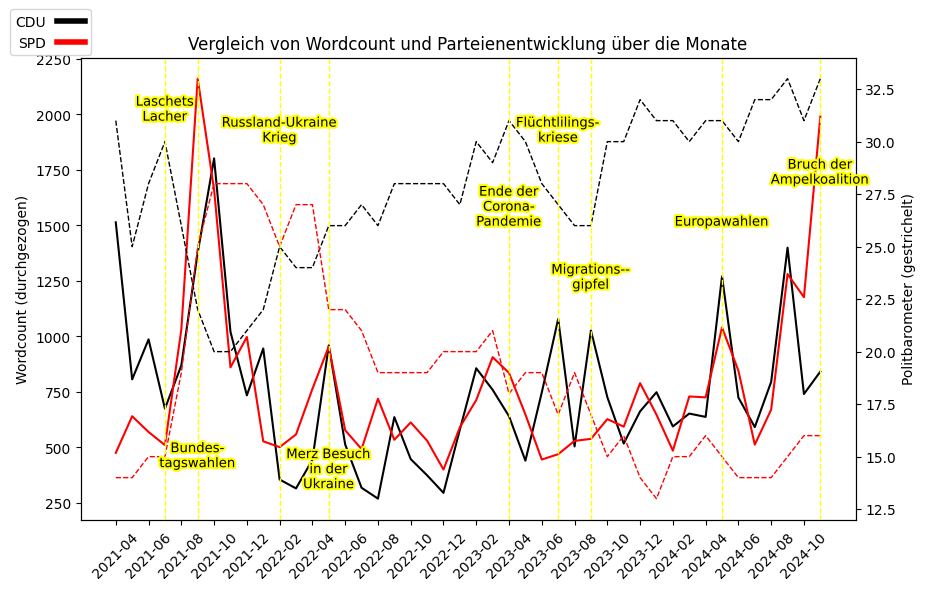

In [8]:
# Erstellen der Plot-Figur
plt.figure(figsize=(10, 6))  # Definiert die Größe der gesamten Plot-Figur
ax1 = plt.gca()  # Erstellt die erste y-Achse (linke Achse)

# Daten vorbereiten für den ersten Plot (Wordcount)
df_grouped_wordcount = pd.DataFrame()  # Initialisiere ein leeres DataFrame für Wordcount-Daten
for word in alt_parteien['word'].unique():  # Iteriere über jedes einzigartige Wort in der 'word'-Spalte
    temp_df = alt_parteien[alt_parteien['word'] == word].groupby('month').agg({'count': 'sum'}).reset_index()  # Aggregiere die 'count'-Werte pro Monat
    temp_df['word'] = word  # Füge die aktuelle Wortzuordnung hinzu
    df_grouped_wordcount = pd.concat([df_grouped_wordcount, temp_df], ignore_index=True)  # Füge die Daten zusammen

# Erster Plot (wordcount)
for word in df_grouped_wordcount['word'].unique():  # Iteriere über alle Wörter in den vorbereiteten Daten
    temp_df = df_grouped_wordcount[df_grouped_wordcount['word'] == word]  # Filtere Daten für das aktuelle Wort
    color = parteifarben.get(word, 'black')  # Hole die Farbe aus der 'parteifarben'-Datenstruktur, Standard: Schwarz
    ax1.plot(temp_df['month'], temp_df['count'], linestyle='-', color=color)  # Plotte die Daten für das Wort

ax1.set_xlabel('')  # Entfernt die Beschriftung der x-Achse
ax1.set_ylabel('Wordcount (durchgezogen)')  # Beschriftet die linke y-Achse
ax1.tick_params(axis='y', labelcolor='black')  # Setzt die Farbe der y-Achse auf Schwarz
ax1.set_xticks(df_grouped_wordcount['month'].unique())  # Setzt die Monate als x-Achsenticks
ax1.set_xticklabels(df_grouped_wordcount['month'].unique(), rotation=45)  # Dreht die Labels um 45 Grad

# Jedes zweite Datum auf der x-Achse anzeigen
unique_months = df_grouped_wordcount['month'].unique()  # Liste aller einzigartigen Monate
ax1.set_xticks(unique_months[::2])  # Zeigt nur jeden zweiten Monat
ax1.set_xticklabels(unique_months[::2], rotation=45)  # Dreht die Labels erneut um 45 Grad

# Daten vorbereiten für den zweiten Plot (wahlen)
df_grouped_parties = wahlen_df.groupby('month').first().reset_index()  # Aggregiere die Wahlen-Daten nach Monat

# Zweiter Plot (wahlen) mit zweiter y-Achse
ax2 = ax1.twinx()  # Erstellt eine zweite y-Achse (rechte Achse)
party_lines = []  # Liste zum Speichern der Linien für die Legende
for column in ['cdu', 'spd']:  # Iteriere über die Parteien
    color = parteifarben.get(column, 'black')  # Hole die Farbe der Partei
    line, = ax2.plot(df_grouped_parties['month'], df_grouped_parties[column],
                     linewidth=1, linestyle="--", label=column.upper(), color=color)  # Plotte die Werte der Partei
    party_lines.append(line)  # Speichere die Linie für die Legende

ax2.set_ylabel('Politbarometer (gestrichelt)')  # Beschriftet die rechte y-Achse
ax2.tick_params(axis='y', labelcolor='black')  # Setzt die Farbe der rechten y-Achse auf Schwarz

# Legende ändern
legend_elements = [Line2D([0], [0], color=line.get_color(), lw=4, label=line.get_label()) for line in party_lines]  # Erstelle Legenden-Elemente
ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-0.1, 1.12), markerfirst=False)  # Platziert die Legende

# Events markieren
events = [("2021-07", "Laschets\nLacher", 31), 
          ("2021-09", "Bundes-\ntagswahlen", 14.5),
          ("2023-04", "Ende der\nCorona-\nPandemie", 26), 
          ("2022-02", "Russland-Ukraine\nKrieg", 30),
          ("2022-05", "Merz Besuch\nin der\nUkraine", 13.5),
          ("2023-07", "Flüchtlilings-\nkriese", 30),
          ("2023-09", "Migrations--\ngipfel", 23),
          ("2024-05", "Europawahlen", 26),
          ("2024-11", "Bruch der\nAmpelkoalition", 28)]  # Definiert die Events

for event_x, event_label, y_position in events:  # Iteriere über die Events
    plt.axvline(x=event_x, color='yellow', linestyle='--', linewidth=1)  # Zeichnet vertikale Linie für jedes Event
    text = plt.text(event_x, y_position, event_label, rotation=0, fontsize=9.5)  # Fügt Text an die Linie hinzu
    text.set_path_effects([patheffects.withStroke(linewidth=3, foreground='yellow')])  # Verleiht dem Text einen gelben Rand
    text.set_horizontalalignment('center')  # Zentriert den Text horizontal

# Plot
plt.title('Vergleich von Wordcount und Parteienentwicklung über die Monate')  # Setzt den Titel des Plots
plt.show()  # Zeigt den Plot an


## Grünen Afd Plott

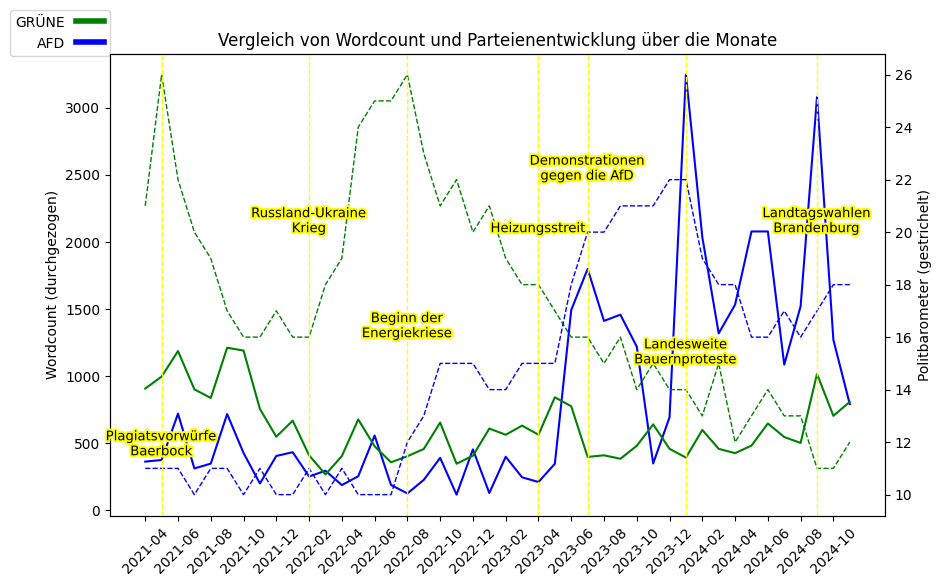

In [9]:
# Erstellen der Plot-Figur
plt.figure(figsize=(10, 6))  # Definiert die Größe der Plot-Figur
ax1 = plt.gca()  # Erstellt die erste y-Achse (linke Achse)

# Daten vorbereiten für den ersten Plot (Wordcount)
df_grouped_wordcount = pd.DataFrame()  # Initialisiere ein leeres DataFrame für Wordcount-Daten
for word in neue_parteien['word'].unique():  # Iteriere über jedes einzigartige Wort in der 'word'-Spalte
    temp_df = neue_parteien[neue_parteien['word'] == word].groupby('month').agg({'count': 'sum'}).reset_index()  # Aggregiere die 'count'-Werte pro Monat
    temp_df['word'] = word  # Füge die aktuelle Wortzuordnung hinzu
    df_grouped_wordcount = pd.concat([df_grouped_wordcount, temp_df], ignore_index=True)  # Füge die Daten zusammen

# Erster Plot (Wörter)
for word in df_grouped_wordcount['word'].unique():  # Iteriere über alle Wörter in den vorbereiteten Daten
    temp_df = df_grouped_wordcount[df_grouped_wordcount['word'] == word]  # Filtere Daten für das aktuelle Wort
    color = parteifarben.get(word, 'black')  # Hole die Farbe aus der 'parteifarben'-Datenstruktur, Standard: Schwarz
    ax1.plot(temp_df['month'], temp_df['count'], linestyle='-', color=color)  # Plotte die Daten für das Wort

ax1.set_xlabel('')  # Entfernt die Beschriftung der x-Achse
ax1.set_ylabel('Wordcount (durchgezogen)')  # Beschriftet die linke y-Achse
ax1.tick_params(axis='y', labelcolor='black')  # Setzt die Farbe der y-Achse auf Schwarz
ax1.set_xticks(df_grouped_wordcount['month'].unique())  # Setzt die Monate als x-Achsenticks
ax1.set_xticklabels(df_grouped_wordcount['month'].unique(), rotation=45)  # Dreht die Labels um 45 Grad

# Anzeige von jedem zweiten Datum auf der x-Achse
unique_months = df_grouped_wordcount['month'].unique()  # Liste aller einzigartigen Monate
ax1.set_xticks(unique_months[::2])  # Zeigt nur jeden zweiten Monat
ax1.set_xticklabels(unique_months[::2], rotation=45)  # Dreht die Labels erneut um 45 Grad


# Daten vorbereiten für den zweiten Plot (wahlen)
df_grouped_parties = wahlen_df.groupby('month').first().reset_index()  # Aggregiere die Wahlen-Daten nach Monat

# Zweiter Plot (wahlen) mit zweiter y-Achse
ax2 = ax1.twinx()  # Erstellt eine zweite y-Achse (rechte Achse)
party_lines = []  # Liste zum Speichern der Linien für die Legende
for column in ['grüne', 'afd']:  # Iteriere über die Parteien
    color = parteifarben.get(column, 'black')  # Hole die Farbe der Partei
    line, = ax2.plot(df_grouped_parties['month'], df_grouped_parties[column],
                     linewidth=1, linestyle="--", label=column.upper(), color=color)  # Plotte die Werte der Partei
    party_lines.append(line)  # Speichere die Linie für die Legende

ax2.set_ylabel('Politbarometer (gestrichelt)')  # Beschriftet die rechte y-Achse
ax2.tick_params(axis='y', labelcolor='black')  # Setzt die Farbe der rechten y-Achse auf Schwarz

# Legenden-Häkchen zu Quadraten ändern
legend_elements = [Line2D([0], [0], color=line.get_color(), lw=4, label=line.get_label()) for line in party_lines]  # Erstelle Legenden-Elemente
ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-0.138, 1.11), markerfirst=False)  # Platziert die Legende

# Events markieren
events = [("2021-05", "Plagiatsvorwürfe\nBaerbock", 11.5),
          ("2022-02", "Russland-Ukraine\nKrieg", 20),
          ("2023-04", "Heizungsstreit", 20),
          ("2023-07", "Demonstrationen\ngegen die AfD", 22),
          ("2022-08", "Beginn der\nEnergiekriese", 16),
          ("2024-01", "Landesweite\nBauernproteste", 15),
          ("2024-09", "Landtagswahlen\nBrandenburg", 20),
          ]  # Definiert die Events

for event_x, event_label, y_position in events:  # Iteriere über die Events
    plt.axvline(x=event_x, color='yellow', linestyle='--', linewidth=1)  # Zeichnet vertikale Linie für jedes Event
    text = plt.text(event_x, y_position, event_label, rotation=0, fontsize=9.5)  # Fügt Text an die Linie hinzu
    text.set_path_effects([patheffects.withStroke(linewidth=3, foreground='yellow')])  # Verleiht dem Text einen gelben Rand
    text.set_horizontalalignment('center')  # Zentriert den Text horizontal

# Plot
plt.title('Vergleich von Wordcount und Parteienentwicklung über die Monate')  # Setzt den Titel des Plots
plt.show()  # Zeigt den Plot an
